In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<Axes: xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

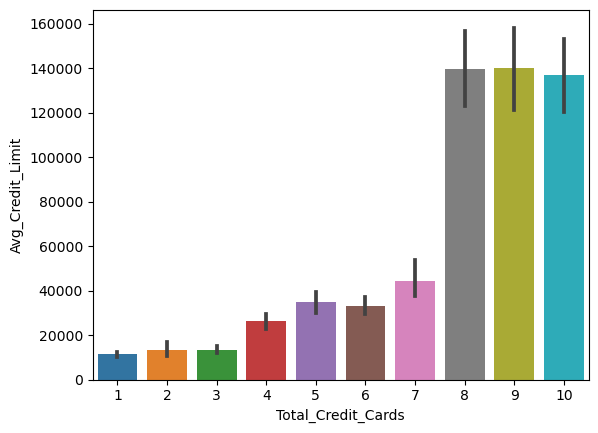

In [10]:
sns.barplot(data = df, x = df['Total_Credit_Cards'], y = df['Avg_Credit_Limit'])

<Axes: xlabel='Total_visits_bank', ylabel='Avg_Credit_Limit'>

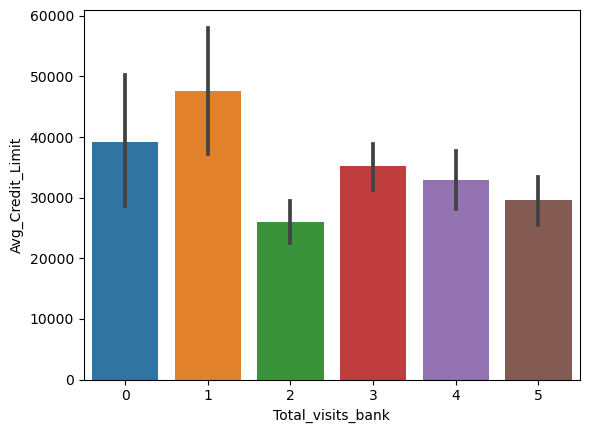

In [12]:
sns.barplot(data = df, x = df['Total_visits_bank'], y = df['Avg_Credit_Limit'])

<Axes: xlabel='Total_visits_online', ylabel='Avg_Credit_Limit'>

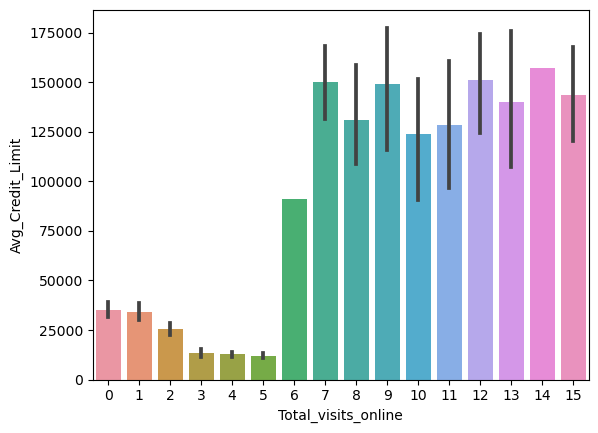

In [13]:
sns.barplot(data = df, x = df['Total_visits_online'], y = df['Avg_Credit_Limit'])

In [18]:
df.drop(['Sl_No', 'Customer Key'], axis = 1)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [21]:
scaler = StandardScaler()
credit_scaled = scaler.fit_transform(df.drop(columns=['Total_visits_online']))

In [22]:
inertia = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(credit_scaled)
    inertia.append(np.sqrt(kmeans.inertia_))

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

Text(0, 0.5, 'Varience')

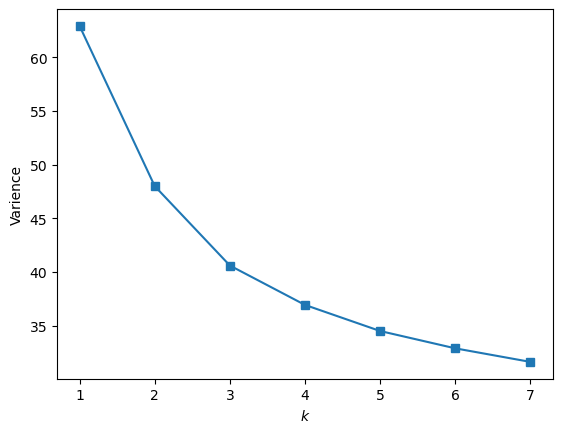

In [23]:
plt.plot(range(1,8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('Varience')

In [41]:
kmeans = KMeans(n_clusters=2, random_state=1)

In [42]:
y = kmeans.fit_predict(credit_scaled)

E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
E:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [43]:
y.shape

(660,)

In [44]:
df['cluster'] = y

In [45]:
df

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,0
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,0
...,...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0,1
656,657,60732,84000,10,1,13,2,1
657,658,53834,145000,8,1,9,1,1
658,659,80655,172000,10,1,15,0,1


<Axes: xlabel='cluster', ylabel='count'>

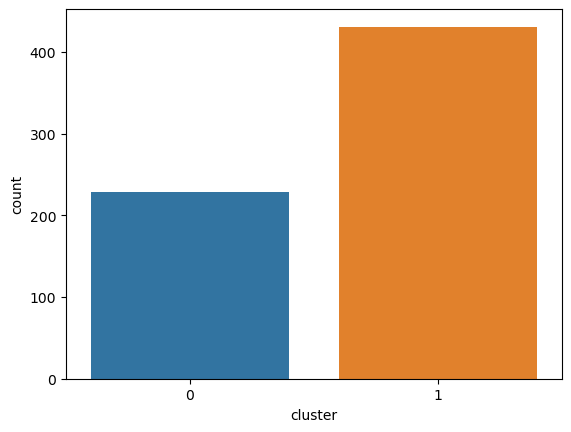

In [46]:
sns.countplot(data = df, x = 'cluster')

<Axes: xlabel='Total_Credit_Cards', ylabel='Avg_Credit_Limit'>

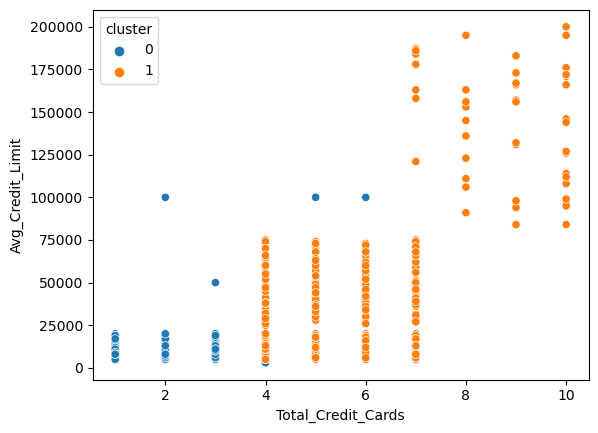

In [47]:
sns.scatterplot(x = df['Total_Credit_Cards'], y = df['Avg_Credit_Limit'], hue=df['cluster'])